# Ans 1.

### Optimization problems

When dealing with Support Vector Machines we come across the concept of unconstrained optimization and constrained optimization. Unconstrained optimization deals with minimizing or maximizing a function without any given constraints. But in SVMs we mainly deal with constrained optimization problems where we want to optimize (minimize/ maximize) a function given a constraint. Below is an example of a constraint optimization problem:

> Minimize f (w) such that h (w) = 0

Here f (w) is the objective function and h (w) is the equality constraint, here we just have one constraint however the model is valid for multiple equality constraint.







### Solution to constrained optimzation

Langrange Multipliers

We can solve this problem of constrained optimization using Lagrange multipliers.


> L (w, B) = f (w) + B.h (w)

B - Lagrange multiplier



### Theorem

- if w is a minima then dL/dw = 0 and dL/dB = 0
- if f (w) is convex then dL/dw = 0 and dL/dB = 0

implies that w is a minima

### Optimality Conditions : Primal Function

For a constrained optimization problem:



> min f (x) such that hi (x) = 0

x ∈ R^m

i = 1, 2, ... N


Construct the Lagrangian:


> L (x, B) = f(x) + ∑ i = 1 n (Bi . hi (x))


then x* is a local minima if there exists a unique B* such that:

- ▽x L (x*, B*) = 0
- ▽B L (x*, B*) = 0
- y^T (▽^2 xx . L (x*, B*)) >= 0

such that ▽x h (x*) y = 0





### Lagrangian Dual Function

Need of a dual function?

- This approach may lead to a simpler optimization problem.
- For cases where the number of primal variables (dimensions of x) is greater than the number of constraints.
- The relationship between the primal and dual variables can provide useful insights about the optimal primal solution.



> max λ, µ q (λ, µ) such that λ >= 0

where,



> q (λ, µ) = minx [ f (x) + λ^T . g (x) + µ^T . h(x) ]



### Types of Duality

- The dual is always concave, even if the primal is not.
- Weak Duality: f (x) >= q (λ, µ) for feasible values of λ, µ, x
- Strong Duality: exists if the optimal values of primal = optimal values of dual i.e, f (x) = q (λ*, µ*)
- Strong duality exists only if the primal objective function and the constraints satisy the following conditions:

1. f (x) and g (x) are convex and h (x) is affine
2. there exists some x such that g (x) <= 0 (slater's condition)
3. there exists primal solution x* and dual solution (λ *, µ *) such that f (x) = q (λ*, µ*)
4. x *, λ *, µ* satify the KKT conditions

### KKT Conditions

1. ▽x L (x*, λ*, µ*) = 0
2. ▽µ L (x*, λ*, µ*) = 0
3. λ* >= 0 [ Dual Feasibility ]
4. g (x*) <= 0 [ Primal Feasibility ]
5. λ* g (x*) = 0 [ Complimentary Slackness ]

### Complimentary Slackness

If g (x*) < 0 then λ* = 0,

similarly if λ* > 0 then g (x*) = 0



## Code Explanation of complimentary slackness

Import libraries

In [2]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

Create 40 linearly seperable data points

In [3]:
np.random.seed(40)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = [0] * 20 + [1] * 20

## Hard Margin SVM

min w, b ( 1/2 . ||w||^2 )

such that 1 - yi ( w^T .xi + b) <= 0

- the objective is convex
- the constraints are affine
- since the data is seperable we know there exists at least one hyperplane (w) that is feasible


### Formulating the Dual

> L (w, b α) = 1/2 ||w|| ^ 2 - Σ 1 to N ( αi [ yi ( w^T . xi + b ) - 1 ] )


> such that q (α) = min w, b L (w, b, α)

- minimize the Lagrangian wrt w and b
- calculate the partial derivates wrt w and b
- substitute back in the Lagrangian to obtain the dual

Hence

> dL (w, b, α)/ db = d/db [ - Σ 1 to N (αi * yi * b) ] = 0

> Σ 1 to N ( αi * yi ) = 0





### The Dual

> max α θ (α) = (Σ i=1 to N αi) - (1/2 Σ i=1 to N Σ j=1 to N yi * yj * αi * αj * xi^T * xj)



> such that
- αi >= 0
- Σ i=1 to N (αi * yi) = 0








In [4]:
clf = svm.SVC(kernel="linear", C=1)
clf.fit(X, y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0] / w[1])

margin = 1 / np.sqrt(np.sum(clf.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin

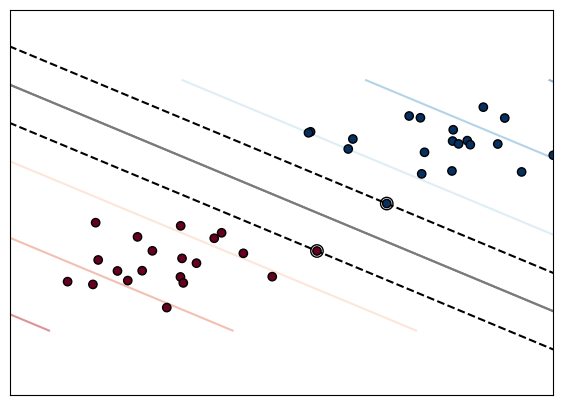

In [5]:
plt.figure(figsize=(7, 5))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors="none", zorder=10, edgecolors="k", cmap=cm.get_cmap("RdBu"))
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k")
plt.axis("tight")
x_min = -4.8
x_max = 4.2
y_min = -6
y_max = 6

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, cmap=cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Given the dual optimization solution α *

- from the complimentary slackness we can say that α* > 0 which means the corresponding constraint gi (w, b) = 0
- Hence, the corresponding training instance has a margin = 1 known as the support vectors.


Optimal solution for the weight vector:
- w* = Σ i=1 to N ( αi * yi * xi)
- training instances will have αi = 0
- prediction for new instances depend on their inner product with support vectors



> w* ^ T x' + b* = [ Σ i=1 to N αi * yi * xi] ^ T


> = Σ i=1 to N αi * yi <xi, x1> + b





The points through which the margin passes in the above example has their αi > 0 (support vectors) while the farther points have their αi = 0.

.

## Soft Margin SVM

min w, b 1/2 ||w|| ^ 2 + C Σ i=1 to N ξi

subject to: yi ( w ^ T * xi + b ) >= 1 - ξi

ξi >= 0

We use the slack variable ξi that transforms the constraints to soft constraints allowing soft constraints allowing instances to have a margin less than 1.

However, for violating constraints we pay a linear penalty (C * ξi)

### Formulating the Dual

L = 1/2 ||w|| ^ 2 + C . Σ i=1 to N ( ξi ) - Σ i=1 to N ( αi [ yi ( w ^ T . xi + b ) - 1 + ξi ] ) - Σ i=1 to N ( ni .ξi )

where θ ( α ) = min w, b, ξ L

- minimize the Lagrangian wrt primal variables
- calculate partial derivates wrt w, b and slack variable
- substitute back in Lagrangian to obtain the dual

### The Dual

max α θ ( α ) = Σ i=1 to N ( αi ) - 1/2 Σ i=1 to N Σ j=1 to N ( yi . yj . αi . αj . xi ^ T . xj )

subject to : 0 <= αj <= C

Σ i=1 to N ( αi . yi ) = 0



In [6]:
clf = svm.SVC(kernel="linear", C=0.02)
clf.fit(X, y)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0] / w[1])

margin = 1 / np.sqrt(np.sum(clf.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin

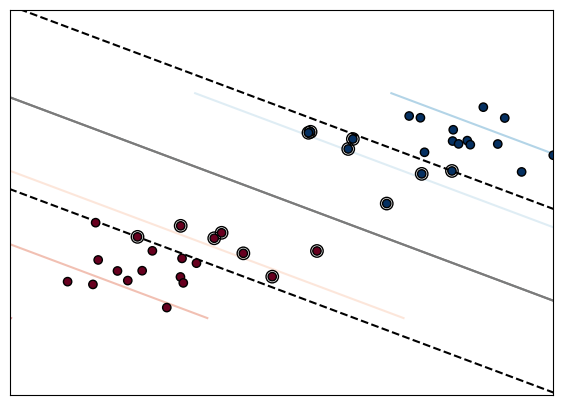

In [7]:
plt.figure(figsize=(7, 5))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors="none", zorder=10, edgecolors="k", cmap=cm.get_cmap("RdBu"))
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k")
plt.axis("tight")
x_min = -4.8
x_max = 4.2
y_min = -6
y_max = 6

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
plt.contour(XX, YY, Z, cmap=cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Given the dual solution α*

- from the complementary slackness we know that αi = 0 implies that the corresponding constraint is inactive gi ( w, b ) <= 0 that is margin >= 1

- αi = C implies that the corresponding constraint is violated gi ( w, b ) > 0 that is margin <= 1

- 0 < αi < C implies that the corresponding constraint is active gi ( w, b ) = 0 that is margin = 0

Optimal solution for the weight vector:

w* = Σ i=1 to N ( αi . yi . xi )

- depends on only support vectors other training instances will have αi = 0
- prediction for new instances only depend on their inner product with support vectors

w* ^ T . x' + b = [ Σ i=1 to N ( αi . yi . xi ) ] ^ T + b

= Σ i=1 to N ( αi . yi < xi . x' > + b )

# Ans 2.

Importing libraries

In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons, make_circles
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.inspection import DecisionBoundaryDisplay

## Half-Circles dataset

Plotting the data points

In [9]:
feature_names = ["Feature #0", "Features #1"]
target_name = "class"

X, y = make_circles(n_samples=100, noise=0.13, random_state=42)

In [10]:
# We store both the data and target in a dataframe to ease plotting
circles = pd.DataFrame(np.concatenate([X, y[:, np.newaxis]], axis=1), columns=feature_names + [target_name],)
circles = circles[circles['Features #1'] >=0]
#moons = moons[moons['Feature #0'] >=0]
data_circles, target_circles = circles[feature_names], circles[target_name]

Text(0.5, 1.0, 'Half Circle dataset')

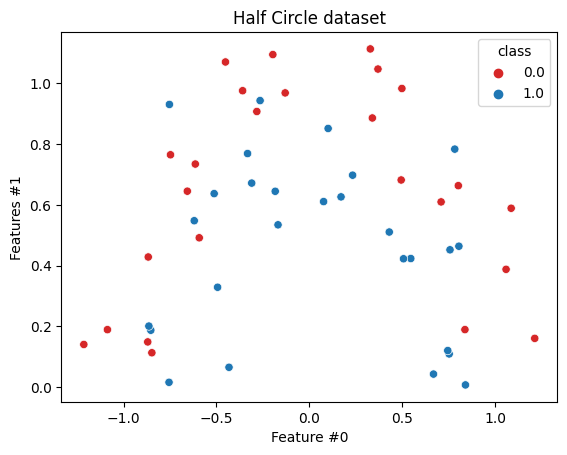

In [11]:
sns.scatterplot(data = circles, x=feature_names[0], y=feature_names[1], hue=target_circles, palette=["tab:red", "tab:blue"],)
plt.title("Half Circle dataset")

### Linear Kernel Decision Boundary

In [12]:
linear_model = make_pipeline(StandardScaler(), SVC(kernel="linear", C=1, gamma=1))

Train validation split

In [13]:
train_set, validation_set = train_test_split(circles, test_size=0.2, random_state=42)

In [14]:
X_train = train_set.iloc[:,0:-1].values
y_train = train_set.iloc[:, -1].values
X_val = validation_set.iloc[:, 0:-1].values
y_val = validation_set.iloc[:, -1].values

K-Fold cross validation on train data

In [15]:
accuracies=cross_val_score(estimator=linear_model,X=X_train,y=y_train,cv=10)
accuracies

array([0.8 , 0.75, 0.25, 0.25, 0.5 , 0.5 , 0.75, 0.75, 0.75, 0.75])

In [16]:
print("average accuracy :",np.mean(accuracies))
print("average std :",np.std(accuracies))

average accuracy : 0.605
average std : 0.20426698215815497


Fitting the model and checking accuracy on validation data

In [17]:
linear_model.fit(X_train,y_train)
print("test accuracy :",linear_model.score(X_val,y_val))

test accuracy : 0.5454545454545454



Grid Search for hyperparameter tuning, changing hyperparameters in the kernel as given by the Grid Search for best results

In [18]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [19]:
print(grid.best_estimator_)

SVC(C=100, gamma=1)


Text(0.5, 1.0, 'Decision Boundary for Linear Kernel')

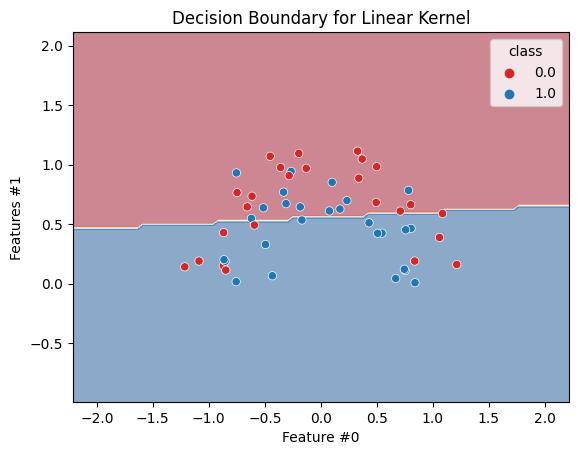

In [20]:
linear_model.fit(data_circles, target_circles)
DecisionBoundaryDisplay.from_estimator(linear_model, data_circles, response_method="predict", cmap="RdBu", alpha=0.5)
sns.scatterplot(data=circles, x=feature_names[0], y = feature_names[1], hue = target_circles, palette=["tab:red", "tab:blue"])
plt.title("Decision Boundary for Linear Kernel")

The linear kernel decision boundary does not classify the two classes very accurately and performs poorly, hence we try a non-linear kernel as the data points are not linearly seperable. We need to plot the data in a higher dimension where we might get a decision boundary. Hence we try the non-linear RBF kernel.

### RBF Kernel Decision Boundary

In [21]:
kernel_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=100, gamma=1))

Train Validation data split

In [22]:
train_set, validation_set = train_test_split(circles, test_size=0.2, random_state=42)

In [23]:
X_train = train_set.iloc[:,0:-1].values
y_train = train_set.iloc[:, -1].values
X_val = validation_set.iloc[:, 0:-1].values
y_val = validation_set.iloc[:, -1].values

K fold Cross Validation

In [24]:
accuracies=cross_val_score(estimator=kernel_model,X=X_train,y=y_train,cv=10)
accuracies

array([1.  , 1.  , 0.75, 1.  , 0.75, 1.  , 1.  , 1.  , 0.75, 0.75])

In [25]:
print("average accuracy :",np.mean(accuracies))
print("average std :",np.std(accuracies))

average accuracy : 0.9
average std : 0.12247448713915891


Fitting the model and checking the accuracy on validation data

In [26]:
kernel_model.fit(X_train,y_train)
print("test accuracy :",kernel_model.score(X_val,y_val))

test accuracy : 0.5454545454545454



Grid Search for hyperparameter tuning, changing hyperparameters in the kernel as given by the Grid Search for best results

In [27]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [28]:
print(grid.best_estimator_)

SVC(C=100, gamma=1)


Text(0.5, 1.0, 'Decision Boundary for RBF Kernel')

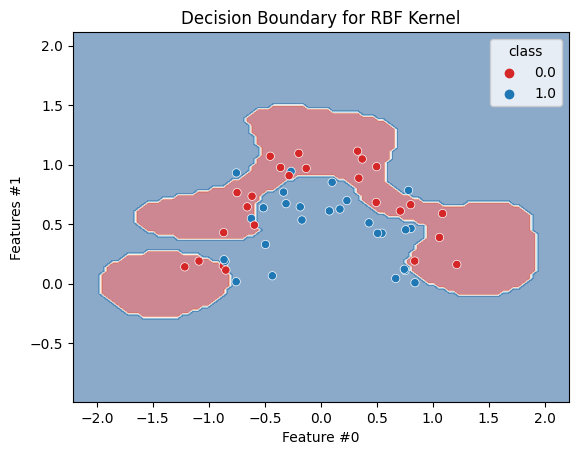

In [29]:
kernel_model.fit(data_circles, target_circles)
DecisionBoundaryDisplay.from_estimator(kernel_model, data_circles, response_method="predict", cmap="RdBu", alpha=0.5)
sns.scatterplot(data=circles, x = feature_names[0], y = feature_names[1], hue = target_circles, palette=["tab:red", "tab:blue"])
plt.title("Decision Boundary for RBF Kernel")

The RBF kernel performs well in making a non-linear decision boundary ( sort of like a semi-circle boundary ) around the blue data points seperating them from the red ones.

## Moons dataset

Plotting the data points

In [30]:
feature_names = ["Feature #0", "Features #1"]
target_name = "class"

X, y = make_moons(n_samples=100, noise=0.13, random_state=42)

# We store both the data and target in a dataframe to ease plotting
moons = pd.DataFrame(np.concatenate([X, y[:, np.newaxis]], axis=1), columns=feature_names + [target_name],)
data_moons, target_moons = moons[feature_names], moons[target_name]

Text(0.5, 1.0, 'Moons dataset')

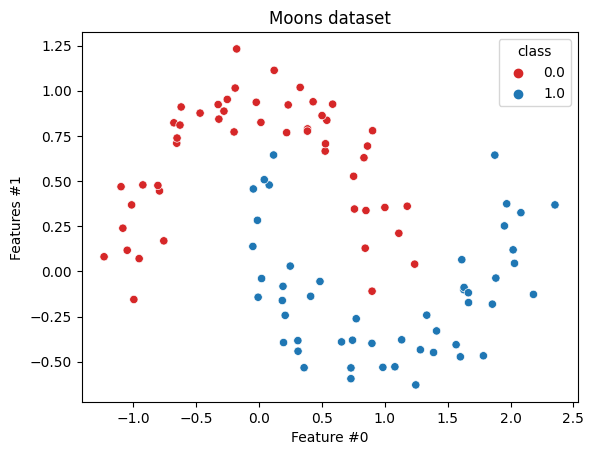

In [31]:
sns.scatterplot(data = moons, x=feature_names[0], y=feature_names[1], hue=target_moons, palette=["tab:red", "tab:blue"],)
plt.title("Moons dataset")

### Linear Kernel Decision Boundary

In [32]:
linear_model = make_pipeline(StandardScaler(), SVC(kernel="linear", C=10, gamma=1))

Train validation data split

In [33]:
train_set, validation_set = train_test_split(moons, test_size=0.2, random_state=42)

In [34]:
X_train = train_set.iloc[:,0:-1].values
y_train = train_set.iloc[:, -1].values
X_val = validation_set.iloc[:, 0:-1].values
y_val = validation_set.iloc[:, -1].values

K fold cross validation on train data set

In [35]:
accuracies=cross_val_score(estimator=linear_model,X=X_train,y=y_train,cv=10)
accuracies

array([0.875, 0.625, 0.875, 0.75 , 0.875, 0.875, 0.875, 0.875, 0.75 ,
       0.875])

In [36]:
print("average accuracy :",np.mean(accuracies))
print("average std :",np.std(accuracies))

average accuracy : 0.825
average std : 0.08291561975888499


In [37]:
linear_model.fit(X_train,y_train)
print("test accuracy :",linear_model.score(X_val,y_val))

test accuracy : 1.0


Grid Search for hyperparameter tuning, changing hyperparameters in the kernel as given by the Grid Search for best results

In [38]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [39]:
print(grid.best_estimator_)

SVC(C=10, gamma=1)


Text(0.5, 1.0, 'Decision boundary of a linear model')

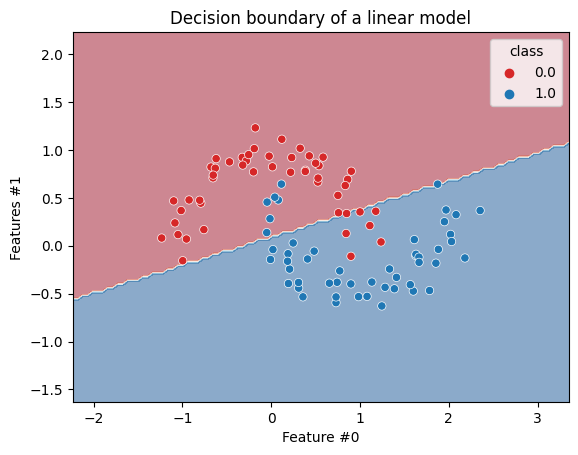

In [40]:
linear_model.fit(data_moons, target_moons)
DecisionBoundaryDisplay.from_estimator(linear_model, data_moons, response_method="predict", cmap="RdBu", alpha=0.5)
sns.scatterplot(data=moons, x=feature_names[0], y=feature_names[1], hue=target_moons, palette=["tab:red", "tab:blue"],)
plt.title("Decision boundary of a linear model")

The linear kernel decision boundary does not classify the two classes very accurately and performs poorly, hence we try a non-linear kernel as the data points are not linearly seperable. We need to plot the data in a higher dimension where we might get a decision boundary. Hence we try the non-linear RBF kernel.

### RBF Kernel Decision Boundary

In [41]:
kernel_model = make_pipeline(StandardScaler(), SVC(kernel="rbf", C = 100, gamma=1))

Train validation data split

In [42]:
train_set, validation_set = train_test_split(moons, test_size=0.2, random_state=42)

In [43]:
X_train = train_set.iloc[:,0:-1].values
y_train = train_set.iloc[:, -1].values
X_val = validation_set.iloc[:, 0:-1].values
y_val = validation_set.iloc[:, -1].values

K fold cross validation on train data set

In [44]:
accuracies=cross_val_score(estimator=kernel_model,X=X_train,y=y_train,cv=10)
accuracies

array([1.   , 0.875, 0.875, 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   ])

In [45]:
print("average accuracy :",np.mean(accuracies))
print("average std :",np.std(accuracies))

average accuracy : 0.975
average std : 0.049999999999999996


In [46]:
kernel_model.fit(X_train,y_train)
print("test accuracy :",kernel_model.score(X_val,y_val))

test accuracy : 0.95


Grid Search for hyperparameter tuning, changing hyperparameters in the kernel as given by the Grid Search for best results

In [47]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [48]:
print(grid.best_estimator_)

SVC(C=10, gamma=1)


Text(0.5, 1.0, 'Decision boundary of a RBF model')

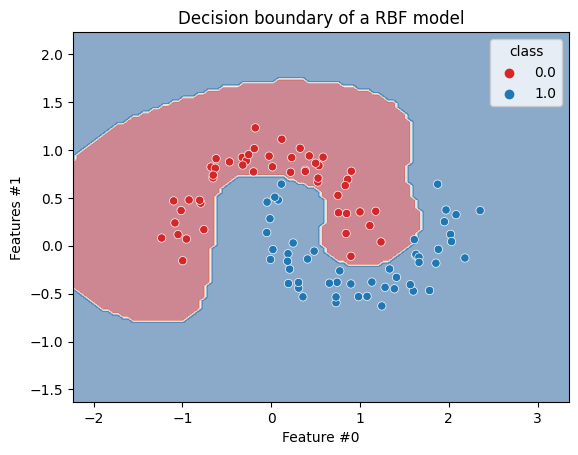

In [49]:
#kernel_model.fit(data_moons, target_moons)
DecisionBoundaryDisplay.from_estimator(kernel_model, data_moons, response_method="predict", cmap="RdBu", alpha=0.5)
sns.scatterplot(data=moons, x=feature_names[0], y=feature_names[1], hue=target_moons, palette=["tab:red", "tab:blue"],)
plt.title("Decision boundary of a RBF model")

The RBF kernel performs well in making a non-linear decision boundary ( sort of like a semi-circle boundary ) around the blue data points seperating them from the red ones.

Citations:
1. https://inria.github.io/scikit-learn-mooc/python_scripts/logistic_regression_non_linear.html
2. https://nthu-datalab.github.io/ml/labs/07_SVM_Pipeline/07_SVM_Pipeline.html
3. https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/
4. https://isheunesu48.medium.com/cross-validation-using-k-fold-with-scikit-learn-cfc44bf1ce6

# Ans 3.

## MLP for Half Circles data

Importing the libraries

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

Splitting the data into train and validation sets

In [51]:
train_set, validation_set = train_test_split(circles, test_size=0.2, random_state=21)

Splitting the dependent and independent variables

In [52]:
X_train = train_set.iloc[:,0:-1].values
y_train = train_set.iloc[:, -1].values
X_val = validation_set.iloc[:, 0:-1].values
y_val = validation_set.iloc[:, -1].values

Defining the accuracy function

In [53]:
def accuracy(confusion_matrix):
  dialog_sum = confusion_matrix.trace()
  sum_of_all_elements = confusion_matrix.sum()
  return dialog_sum / sum_of_all_elements

Defining the classifier

In [86]:
classifier = MLPClassifier(hidden_layer_sizes= (100, 100, 50), max_iter=165, activation= 'tanh', alpha= 0.0001, learning_rate= 'constant', solver= 'adam')

K fold cross validation on train data set

In [87]:
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
accuracies

array([0.6 , 0.75, 0.75, 0.75, 0.75, 0.5 , 1.  , 0.5 , 0.75, 1.  ])

In [88]:
print("average accuracy :",np.mean(accuracies))
print("average std :",np.std(accuracies))

average accuracy : 0.735
average std : 0.16439282222773596


In [89]:
classifier.fit(X_train,y_train)
print("test accuracy :",classifier.score(X_val,y_val))

test accuracy : 0.7272727272727273


Grid Search

In [91]:
mlp_gs = MLPClassifier(max_iter=165)
parameter_space = {
    'hidden_layer_sizes': [(100, 100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=165), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(100, 100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [92]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


Predicting the y variable on the validation set

In [93]:
y_pred = classifier.predict(X_val)

Confusion matrix, calculating the accuracy

In [94]:
cm = confusion_matrix(y_pred, y_val)
print("Accuracy of MLP Classifer: ", accuracy(cm))

Accuracy of MLP Classifer:  0.7272727272727273


Plotting the decision boundary with the MLP classifier

In [95]:
h = 0.02
x_min = -4.8
x_max = 4.2
y_min = -6
y_max = 6
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [96]:
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

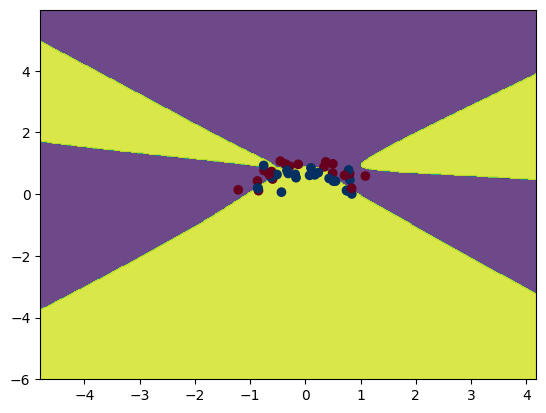

In [97]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="RdBu")

Rational for training process:

After importing the libararies, splitting the data into train, validation sets and the dependent and independent variables, defined the MLP classifier and performed K fold cross validation since we have less data and we dont want to overfit - we get the best model. Grid search is applied for obtaining the best hyperparamters. We check their accuracies on train and test data. Then the model with the best hyperparameters fits the train data. The decision boundary is then visualized and the decision boundary is observed.


Design parameters:

Using grid search the best hyperparameters are chosen. The activation function Tanh is chosen due to the non linear nature of the data. Adam optimizer is used as it works the best in this case.

## MLP for Moons data

Splitting the data into train and validation sets

In [107]:
train_set, validation_set = train_test_split(moons, test_size=0.2, random_state = 21)

Splitting the data into dependent and independent variables

In [108]:
X_train = train_set.iloc[:, 0:-1].values
X_val = validation_set.iloc[:, 0:-1].values
y_train = train_set.iloc[:, -1].values
y_val = validation_set.iloc[:, -1].values

Defining the classifier

In [109]:
classifier = MLPClassifier(hidden_layer_sizes=(100, 100, 50), activation='relu', alpha=0.0001, learning_rate='constant', solver ='adam')

K fold cross validation on train data set

In [110]:
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
accuracies

array([1.   , 1.   , 1.   , 1.   , 0.875, 1.   , 1.   , 1.   , 0.875,
       1.   ])

In [111]:
print("average accuracy :",np.mean(accuracies))
print("average std :",np.std(accuracies))

average accuracy : 0.975
average std : 0.049999999999999996


In [112]:
classifier.fit(X_train,y_train)
print("test accuracy :",classifier.score(X_val,y_val))

test accuracy : 1.0


Grid Search

In [104]:
mlp_gs = MLPClassifier(max_iter=165)
parameter_space = {
    'hidden_layer_sizes': [(100, 100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=165), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(100, 100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [105]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


Predicting the indepedent variable on the validation set

In [113]:
y_pred = classifier.predict(X_val)

Confusion matrix, calculating the accuracy

In [114]:
cm = confusion_matrix(y_pred, y_val)
print("Accuracy of MLP Classifier: ", accuracy(cm))

Accuracy of MLP Classifier:  1.0


In [115]:
h = 0.02
x_min = -4.8
x_max = 4.2
y_min = -6
y_max = 6
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [116]:
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

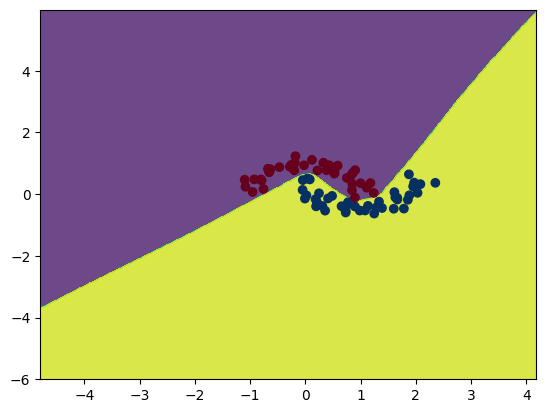

In [117]:
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap="RdBu")

Rational for training process:

After importing the libararies, splitting the data into train, validation sets and the dependent and independent variables, defined the MLP classifier and performed K fold cross validation since we have less data and we dont want to overfit - we get the best model. Grid search is applied for obtaining the best hyperparamters. We check their accuracies on train and test data. Then the model with the best hyperparameters fits the train data. The decision boundary is then visualized and the decision boundary is observed.


Design parameters:

Using grid search the best hyperparameters are chosen. The activation function Tanh is chosen due to the non linear nature of the data. Adam optimizer is used as it works the best in this case.

## SVM vs MLP algorithms

SVMs

Both soft and hard margin SVMs are convex quadratic problems with linear constraints. Quadratic problems are usually computationally expensive combined with Gradient Descent. Hence, Stochastic Gradient Stochastic comes into play. It takes more steps and yet is more computationally efficient.

- The training time for SVM can be given as O ( n . d ^ 2) if d < n

d: dimensions

n: number of data points

- The run time ( predicting time ) can be given as O ( k . n )

k: number of support vectors  ( 0 < k <= d )


My MLP code took longer to run than the SVM code hence the computation cost is higher.